### 3.1 计算图
#### 3.1.1 基于numpy实现

In [67]:
import numpy as np
import math

In [68]:
class Computational_Graph:
    def __init__(self):
        self.x1, self.x2, self.x3 = 0, 0, 0
        self.z1, self.z2, self.z3 = 0, 0, 0
        self.u1, self.u2, self.u3 = 0, 0, 0
        self.v1, self.v2, self.v3 = 0, 0, 0
        self.y1, self.y2 = 0, 0
        
        self.z1_to_x1, self.z1_to_x2, self.z1_to_x3 = 0, 0, 0
        self.z2_to_x1, self.z2_to_x2, self.z2_to_x3 = 0, 0, 0
        self.z3_to_x1, self.z3_to_x2, self.z3_to_x3 = 0, 0, 0
        self.u1_to_z1, self.u1_to_z2, self.u1_to_z3 = 0, 0, 0
        self.u2_to_z1, self.u2_to_z2, self.u2_to_z3 = 0, 0, 0
        self.u3_to_z1, self.u3_to_z2, self.u3_to_z3 = 0, 0, 0
        self.v1_to_u1, self.v1_to_u2, self.v1_to_u3 = 0, 0, 0
        self.v2_to_u1, self.v2_to_u2, self.v2_to_u3 = 0, 0, 0
        self.v3_to_u1, self.v3_to_u2, self.v3_to_u3 = 0, 0, 0
        self.y1_to_v1, self.y1_to_v2, self.y1_to_v3 = 0, 0, 0
        self.y2_to_v1, self.y2_to_v2, self.y2_to_v3 = 0, 0, 0
        self.y1_to_x1, self.y1_to_x2, self.y1_to_x3 = 0, 0, 0
        self.y2_to_x1, self.y2_to_x2, self.y2_to_x3 = 0, 0, 0

    def function_z1(self, x1, x2):
        return 2 * x1 + x2

    def function_z2(self, x1, x3):
        return x1 * 3 * x3

    def function_z3(self, x2, x3):
        return -1 * x3 * 2 * x2

    def function_u1(self, z1):
        return math.sin(z1)

    def function_u2(self, x3, z2):
        return 2 * x3 + z2

    def function_u3(self, z1, z3):
        return 2 * z1 + z3

    def function_v1(self, u1, u3):
        return u1 - u3

    def function_v2(self, u2):
        return math.sin(-1 * u2)

    def function_v3(self, u1, u3):
        return u1 * u3

    def function_y1(self, v1, v2):
        return v1 ** 2 + v2 ** 3

    def function_y2(self, v2, v3):
        return v2 * v3
    
    def forward(self, x1, x2, x3):
        self.x1, self.x2, self.x3 = x1, x2, x3
        self.z1 = self.function_z1(self.x1, self.x2)
        self.z2 = self.function_z2(self.x1, self.x3)
        self.z3 = self.function_z3(self.x2, self.x3)
        self.u1 = self.function_u1(self.z1)
        self.u2 = self.function_u2(self.x3, self.z2)
        self.u3 = self.function_u3(self.z1, self.z3)
        self.v1 = self.function_v1(self.u1, self.u3)
        self.v2 = self.function_v2(self.u2)
        self.v3 = self.function_v3(self.u1, self.u3)
        self.y1 = self.function_y1(self.v1, self.v2)
        self.y2 = self.function_y2(self.v2, self.v3)

    def backward(self):
        self.y1_to_v1 = 2 * self.v1
        self.y1_to_v2 = 3 * (self.v2 ** 2)
        self.y2_to_v2 = self.v3
        self.y2_to_v3 = self.v2
        self.v1_to_u1 = 1
        self.v1_to_u3 = -1
        self.v2_to_u2 = math.cos(-1 * self.u2) * -1
        self.v3_to_u1 = self.u3
        self.v3_to_u3 = self.u1
        self.u1_to_z1 = math.cos(self.z1)
        self.u2_to_z2 = 1
        self.u2_to_x3 = 2
        self.u3_to_z1 = 2
        self.u3_to_z3 = 1
        self.z1_to_x1 = 2
        self.z1_to_x2 = 1
        self.z2_to_x1 = 3 * self.x3
        self.z2_to_x3 = 3 * self.x1
        self.z3_to_x2 = -2 * self.x3
        self.z3_to_x3 = -2 * self.x2

        self.z_to_x = np.array([[self.z1_to_x1, self.z1_to_x2, self.z1_to_x3],
                                [self.z2_to_x1, self.z2_to_x2, self.z2_to_x3],
                                [self.z3_to_x1, self.z3_to_x2, self.z3_to_x3]])
        self.u_to_z = np.array([[self.u1_to_z1, self.u1_to_z2, self.u1_to_z3],
                                [self.u2_to_z1, self.u2_to_z2, self.u2_to_z3],
                                [self.u3_to_z1, self.u3_to_z2, self.u3_to_z3]])
        self.v_to_u = np.array([[self.v1_to_u1, self.v1_to_u2, self.v1_to_u3],
                                [self.v2_to_u1, self.v2_to_u2, self.v2_to_u3],
                                [self.v3_to_u1, self.v3_to_u2, self.v3_to_u3]])
        self.y_to_v = np.array([[self.y1_to_v1, self.y1_to_v2, self.y1_to_v3],
                                [self.y2_to_v1, self.y2_to_v2, self.y2_to_v3]])
        
        self.u_to_x = self.u_to_z @ self.z_to_x
        self.u_to_x += np.array([[0, 0, 0],
                                 [0, 0, self.u2_to_x3],
                                 [0, 0, 0]])
        grad = self.y_to_v @ self.v_to_u @ self.u_to_x
        [[self.y1_to_x1, self.y1_to_x2, self.y1_to_x3],
         [self.y2_to_x1, self.y2_to_x2, self.y2_to_x3]] = grad
        
        print(grad)

In [69]:
x1, x2, x3 = 1, 1, 1
model = Computational_Graph()
model.forward(x1, x2, x3)
model.backward()

[[ 43.80455116   7.64052447 -19.34808284]
 [ -7.53369401  -3.79731135  -1.071255  ]]


#### 3.1.2 基于Pytorch

In [70]:
import torch
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    
    def forward(self, x):
        z1 = 2 * x[0] + x[1]
        z2 = x[0] * 3 * x[2]
        z3 = -1 * x[2] * 2 * x[1]
        u1 = torch.sin(z1)
        u2 = 2 * x[2] + z2
        u3 = 2 * z1 + z3
        v1 = u1 - u3
        v2 = torch.sin(-1 * u2)
        v3 = u1 * u3
        y1 = v1 * v1 + v2 * v2 * v2
        y2 = v2 * v3
        return y1, y2

In [71]:
x = torch.tensor([1, 1, 1], dtype=float, requires_grad=True)
model = Net()
y1, y2 = model(x)
grad_y1 = torch.autograd.grad(y1, x, create_graph=True)
grad_y2 = torch.autograd.grad(y2, x, create_graph=True)
print(grad_y1[0].data)
print(grad_y2[0].data)

tensor([ 43.8046,   7.6405, -19.3481], dtype=torch.float64)
tensor([-7.5337, -3.7973, -1.0713], dtype=torch.float64)


### 3.2 基于前向神经网络的分类预测
#### 3.2.1 数据可视化

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
largeTrain_dataset = np.loadtxt('./dataset/classification-dataset/largeTrain.csv', delimiter=',')
mediumTrain_dataset = np.loadtxt('./dataset/classification-dataset/mediumTrain.csv', delimiter=',')
smallTrain_dataset = np.loadtxt('./dataset/classification-dataset/smallTrain.csv', delimiter=',')
datasets_list = [smallTrain_dataset, mediumTrain_dataset, largeTrain_dataset]

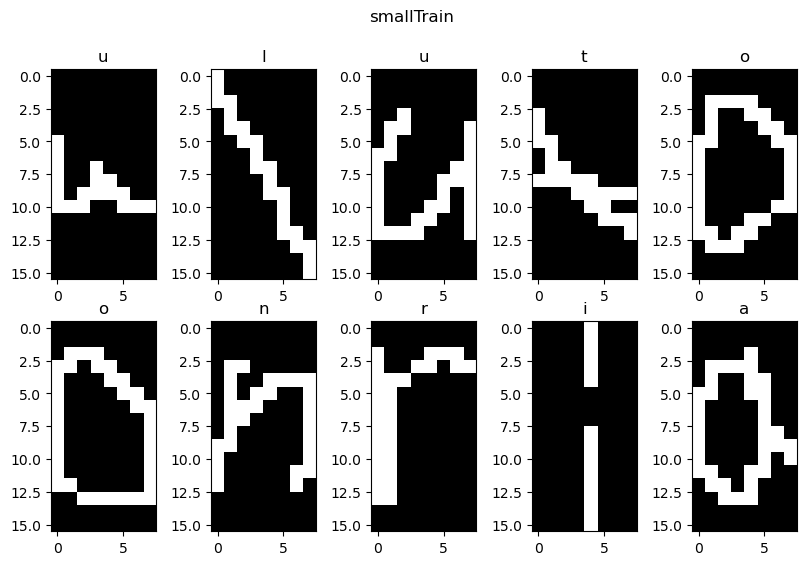

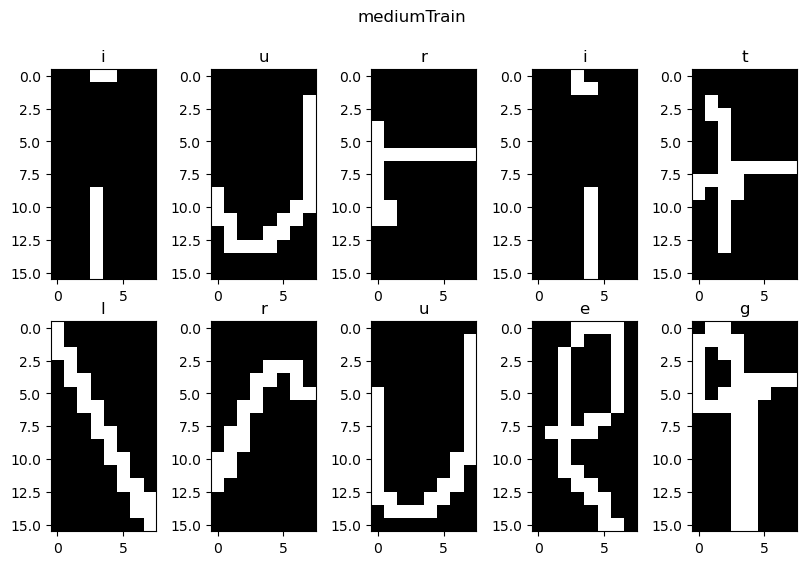

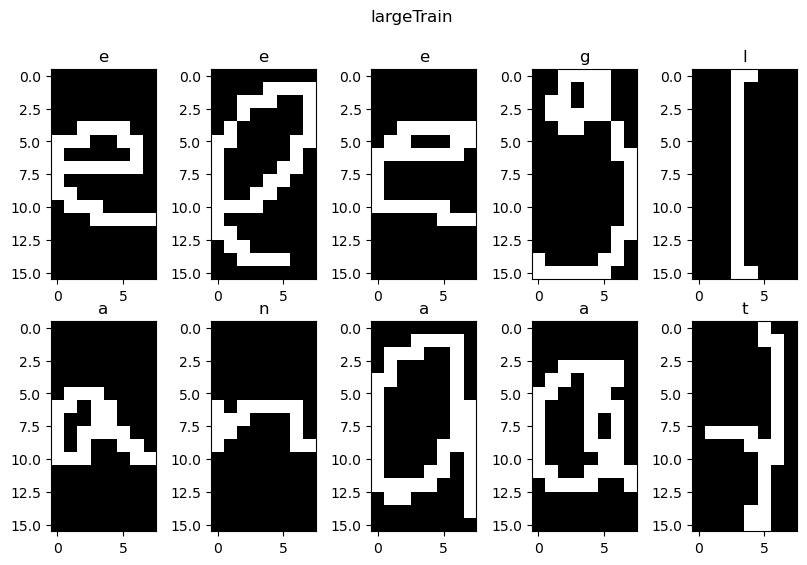

In [74]:
labels = ['a', 'e', 'g', 'i', 'l', 'n', 'o', 'r', 't', 'u']
datasets_name_list = ['smallTrain', 'mediumTrain', 'largeTrain']
for dataset_name, dataset in zip(datasets_name_list, datasets_list):
    plt.figure(figsize=(10, 6))
    plt.suptitle(dataset_name)
    random_idx = np.random.randint(0, len(dataset), 10)
    for i, idx in enumerate(random_idx):
        label_idx = int(dataset[idx][0])
        image = dataset[idx][1:]
        plt.subplot(2, 5, i+1)
        plt.imshow(image.reshape(16, 8), cmap='gray')
        plt.title(labels[label_idx])
    plt.show()

#### 3.2.2 基于numpy

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
largeTrain_dataset = np.loadtxt('./dataset/classification-dataset/largeTrain.csv', delimiter=',')
largeValidation_dataset = np.loadtxt('./dataset/classification-dataset/largeValidation.csv', delimiter=',')
mediumTrain_dataset = np.loadtxt('./dataset/classification-dataset/mediumTrain.csv', delimiter=',')
mediumValidation_dataset = np.loadtxt('./dataset/classification-dataset/mediumValidation.csv', delimiter=',')
smallTrain_dataset = np.loadtxt('./dataset/classification-dataset/smallTrain.csv', delimiter=',')
smallValidation_dataset = np.loadtxt('./dataset/classification-dataset/smallValidation.csv', delimiter=',')

def data_loader(dataset):
    data = dataset[:, 1:]
    label = dataset[:, 0]
    label = list(map(int, label))
    label = np.eye(10)[label]
    return data, label

smallTrain_dataset_data, smallTrain_dataset_label = data_loader(smallTrain_dataset)
smallValidation_dataset_data, smallValidation_dataset_label = data_loader(smallValidation_dataset)
largeTrain_dataset_data, largeTrain_dataset_label = data_loader(largeTrain_dataset)
largeValidation_dataset_data, largeValidation_dataset_label = data_loader(largeValidation_dataset)
mediumTrain_dataset_data, mediumTrain_dataset_label = data_loader(mediumTrain_dataset)
mediumValidation_dataset_data, mediumValidation_dataset_label = data_loader(mediumValidation_dataset)

In [77]:
class Dataset():
    def __init__(self, data, labels):
        self.data = np.array(data)
        self.labels = np.array(labels)

    def __getitem__(self, index):
        data_sample = self.data[index]
        label_sample = self.labels[index]
        return data_sample, label_sample

    def __len__(self):
        return len(self.data)

class DataLoader():
    def __init__(self, dataset, batch_size=16, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __iter__(self):
        indexes = np.arange(len(self.dataset))
        if self.shuffle:
            np.random.shuffle(indexes)
        self.iter_indexes = iter(indexes)
        return self

    def __next__(self):
        data_indexes = []
        for _ in range(self.batch_size):
            try:
                data_indexes.append(next(self.iter_indexes))
            except StopIteration:
                break
        if len(data_indexes) == 0:
            raise StopIteration

        batch_data = [self.dataset[idx][0] for idx in data_indexes]
        batch_labels = [self.dataset[idx][1] for idx in data_indexes]
        return np.array(batch_data), np.array(batch_labels)
    
    def __len__(self):
        return -(-len(self.dataset) // self.batch_size)

In [78]:
class ClassificationModel:
    def __init__(self, input_size=128, hidden_size=256, num_class=10, lr=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_class = num_class
        self.lr = lr
        np.random.seed(0)
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        # self.b1 = np.zeros((1, self.hidden_size))
        self.b1 = np.random.randn(1, self.hidden_size) * 0.01
        self.W2 = np.random.randn(self.hidden_size, self.hidden_size) * 0.01
        # self.b2 = np.zeros((1, self.hidden_size))
        self.b2 = np.random.randn(1, self.hidden_size) * 0.01
        self.W3 = np.random.randn(self.hidden_size, self.num_class) * 0.01
        # self.b3 = np.zeros((1, self.num_class))
        self.b3 = np.random.randn(1, self.num_class) * 0.01
        self.A1, self.A2, self.A3 = None, None, None
        self.Z1, self.Z2, self.Z3 = None, None, None
        self.dZ1, self.dZ2, self.dZ3 = None, None, None
        self.dW1, self.dW2, self.dW3 = None, None, None
        self.db1, self.db2, self.db3 = None, None, None

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.sigmoid(self.Z2)
        self.Z3 = self.A2 @ self.W3 + self.b3
        self.A3 = self.softmax(self.Z3)
        return self.A3
    
    def backward(self, X, Y, out):
        data_nums = len(X)
        self.dZ3 = out - Y
        self.dW3 = self.A2.T @ self.dZ3 / data_nums
        self.db3 = np.sum(self.dZ3, axis=0, keepdims=True) / data_nums
        self.dZ2 = self.dZ3 @ self.W3.T * self.sigmoid_derivative(self.Z2)
        self.dW2 = self.A1.T @ self.dZ2 / data_nums
        self.db2 = np.sum(self.dZ2, axis=0, keepdims=True) / data_nums
        self.dZ1 = self.dZ2 @ self.W2.T * self.sigmoid_derivative(self.Z1)
        self.dW1 = X.T @ self.dZ1 / data_nums
        self.db1 = np.sum(self.dZ1, axis=0, keepdims=True) / data_nums

        self.W1 -= self.dW1 * self.lr
        self.b1 -= self.db1 * self.lr
        self.W2 -= self.dW2 * self.lr
        self.b2 -= self.db2 * self.lr
        self.W3 -= self.dW3 * self.lr
        self.b3 -= self.db3 * self.lr

    def cross_entropy_loss(self, Y_pred, Y_true):
        return -np.mean(Y_true * np.log(Y_pred))
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def sigmoid_derivative(self, X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))
    
    def softmax(self, X):
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)


In [79]:
def train(model, train_dataloader, epochs=1000):
    loss_list = []
    for epoch in range(1, epochs+1):
        loss = 0
        for data_batch, label_batch in train_dataloader:
            out = model.forward(data_batch)
            loss += model.cross_entropy_loss(out, label_batch)
            model.backward(data_batch, label_batch, out)
            
        loss /= train_dataloader.__len__()
        loss_list.append(loss)
        if epoch % 100 == 0 or epoch == 1:
            print(f"epoch: {epoch}, loss: {loss}")
    return loss_list

def validate(model, valid_dataloader):
    loss_sum = 0
    correct_pred_nums = 0
    for data_batch, label_batch in valid_dataloader:
        out = model.forward(data_batch)
        pred = np.argmax(out, axis=1)
        loss = model.cross_entropy_loss(out, label_batch)
        loss_sum += loss
        correct_pred_nums += np.sum(pred == np.argmax(label_batch, axis=1))
    validate_loss = loss_sum / valid_dataloader.__len__()
    validate_accuracy = correct_pred_nums / len(valid_dataloader.dataset)
    return validate_loss, validate_accuracy

def predict(model, valid_dataset):
    labels_map = ['a', 'e', 'g', 'i', 'l', 'n', 'o', 'r', 't', 'u']
    dataset = valid_dataset.data
    lables = valid_dataset.labels
    random_idx = np.random.randint(0, len(dataset), 5)
    dataset = dataset[random_idx]
    lables = lables[random_idx]
    out = model.forward(dataset)
    pred_label = np.argmax(out, axis=1)
    pred_label = [labels_map[i] for i in pred_label]
    true_label = np.argmax(lables, axis=1)
    true_label = [labels_map[i] for i in true_label]
    return dataset, pred_label, true_label
    

def show_result(loss_list, validate_loss, validate_accuracy, dataset_name, model, valid_dataset):
    dataset, pred_label, true_label = predict(model, valid_dataset)
    
    epochs = np.arange(len(loss_list))
    plt.plot(epochs, loss_list)
    plt.title(f'Dataset loss of: {dataset_name}\nValidate loss: {validate_loss}\n Validate accuracy: {validate_accuracy}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Predicted dataset: {dataset_name}')
    for i, image in enumerate(dataset):
        
        plt.subplot(1, 5, i+1)
        plt.imshow(image.reshape(16, 8), cmap='gray')
        plt.title(f'True Label: {true_label[i]}\nPredicted Label: {pred_label[i]}')
    plt.show()


In [80]:
batch_size = 16
smallTrain_dataset = Dataset(smallTrain_dataset_data, smallTrain_dataset_label)
smallTrain_dataloader = DataLoader(smallTrain_dataset, batch_size=batch_size, shuffle=True)
smallValidation_dataset = Dataset(smallValidation_dataset_data, smallValidation_dataset_label)
smallValidation_dataloader = DataLoader(smallValidation_dataset, batch_size=batch_size, shuffle=True)

mediumTrain_dataset = Dataset(mediumTrain_dataset_data, mediumTrain_dataset_label)
mediumTrain_dataloader = DataLoader(mediumTrain_dataset, batch_size=batch_size, shuffle=True)
mediumValidation_dataset = Dataset(mediumValidation_dataset_data, mediumValidation_dataset_label)
mediumValidation_dataloader = DataLoader(mediumValidation_dataset, batch_size=batch_size, shuffle=True)

largeTrain_dataset = Dataset(largeTrain_dataset_data, largeTrain_dataset_label)
largeTrain_dataloader = DataLoader(largeTrain_dataset, batch_size=batch_size, shuffle=True)
largeValidation_dataset = Dataset(largeValidation_dataset_data, largeValidation_dataset_label)
largeValidation_dataloader = DataLoader(largeValidation_dataset, batch_size=batch_size, shuffle=True)

dataset_name_list = ['Small', 'Medium', 'Large']
valid_dataset_list = [smallTrain_dataset, mediumTrain_dataset, largeTrain_dataset]
train_dataloader_list = [smallTrain_dataloader, mediumTrain_dataloader, largeTrain_dataloader]
valid_dataloader_list = [smallValidation_dataloader, mediumValidation_dataloader, largeValidation_dataloader]


Dataset: Small
epoch: 1, loss: 0.27127056728268606
epoch: 100, loss: 0.15402615740104394


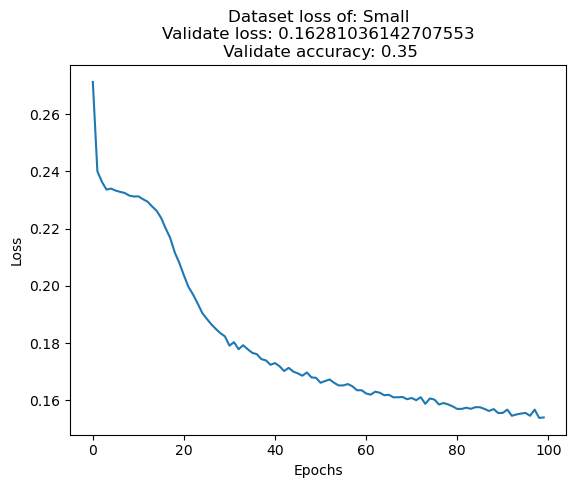

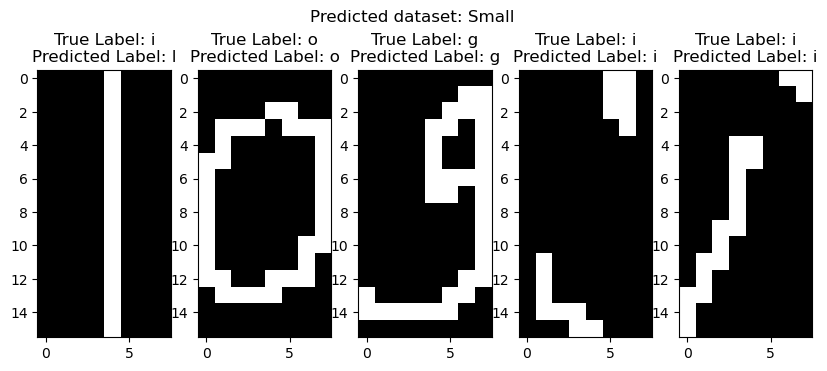

Dataset: Medium
epoch: 1, loss: 0.23785274670869302
epoch: 100, loss: 0.008172839432321482


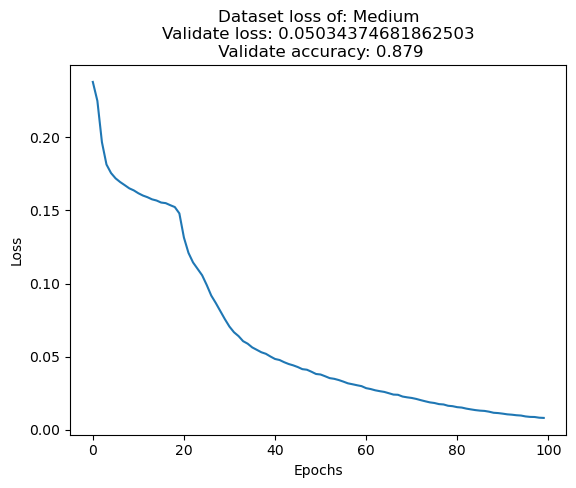

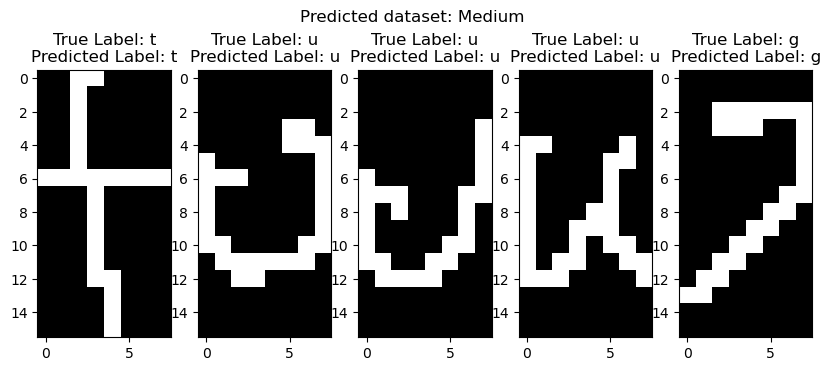

Dataset: Large
epoch: 1, loss: 0.23192889693295765
epoch: 100, loss: 0.004159369008887189


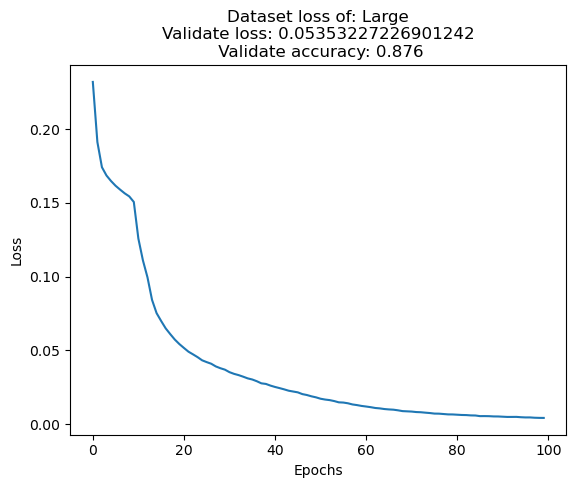

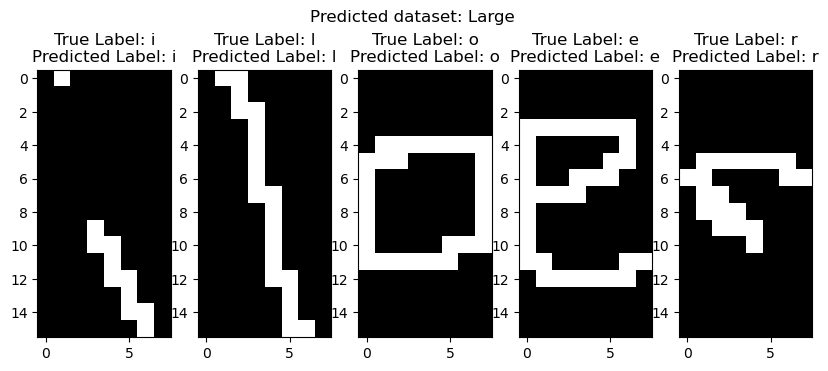

In [81]:
epochs = 100
lr = 0.3
input_size = 128
hidden_size = 256
num_classes = 10

for dataset_name, train_dataloader, valid_dataloader, valid_dataset in zip(dataset_name_list, train_dataloader_list, valid_dataloader_list, valid_dataset_list):
    print(f'Dataset: {dataset_name}')
    model = ClassificationModel(input_size=input_size, hidden_size=hidden_size, num_class=num_classes, lr=lr)
    loss_list = train(model=model, train_dataloader=train_dataloader, epochs=epochs)
    validate_loss, validate_accuracy = validate(model=model, valid_dataloader=valid_dataloader)
    show_result(loss_list, validate_loss, validate_accuracy, dataset_name, model, valid_dataset)

#### 3.2.3 基于Pytorch

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [83]:
largeTrain_dataset = np.loadtxt('./dataset/classification-dataset/largeTrain.csv', delimiter=',')
largeValidation_dataset = np.loadtxt('./dataset/classification-dataset/largeValidation.csv', delimiter=',')
mediumTrain_dataset = np.loadtxt('./dataset/classification-dataset/mediumTrain.csv', delimiter=',')
mediumValidation_dataset = np.loadtxt('./dataset/classification-dataset/mediumValidation.csv', delimiter=',')
smallTrain_dataset = np.loadtxt('./dataset/classification-dataset/smallTrain.csv', delimiter=',')
smallValidation_dataset = np.loadtxt('./dataset/classification-dataset/smallValidation.csv', delimiter=',')

def data_loader(dataset):
    data = dataset[:, 1:]
    label = dataset[:, 0]
    return data, label

smallTrain_dataset_data, smallTrain_dataset_label = data_loader(smallTrain_dataset)
smallValidation_dataset_data, smallValidation_dataset_label = data_loader(smallValidation_dataset)
largeTrain_dataset_data, largeTrain_dataset_label = data_loader(largeTrain_dataset)
largeValidation_dataset_data, largeValidation_dataset_label = data_loader(largeValidation_dataset)
mediumTrain_dataset_data, mediumTrain_dataset_label = data_loader(mediumTrain_dataset)
mediumValidation_dataset_data, mediumValidation_dataset_label = data_loader(mediumValidation_dataset)

In [84]:
class OCR_DataSet(Dataset):
    def __init__(self, data, label):
        super(OCR_DataSet, self).__init__()
        self.data = data
        self.label = label
    
    def __getitem__(self, index):
        return self.data[index], self.label[index]
    
    def __len__(self):
        return len(self.data)

In [85]:
class ClassificationModel(torch.nn.Module):
    def __init__(self, input_size=128, hidden_size=256, num_class=10):
        super(ClassificationModel, self).__init__()
        self.l1 = torch.nn.Linear(input_size, hidden_size)
        self.l2 = torch.nn.Linear(hidden_size, hidden_size)
        self.l3 = torch.nn.Linear(hidden_size, num_class)
        
    
    def forward(self, x):
        x = torch.sigmoid(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        x = self.l3(x)
        return x

In [86]:
def train(model, optimizer, criterion, train_dataloader, epochs=1000):
    loss_list = []
    for epoch in range(1, epochs+1):
        loss = 0
        for data_batch, label_batch in train_dataloader:
            data_batch = data_batch.to(device)
            label_batch = label_batch.to(device)
            optimizer.zero_grad()
            out = model(data_batch)
            _loss = criterion(out, label_batch)
            loss += _loss.item()
            _loss.backward()
            optimizer.step()
        loss /= len(train_dataloader)
        loss_list.append(loss)
        if epoch % 100 == 0 or epoch == 1:
            print(f"device: {device}, epoch: {epoch}, loss: {loss}")
    return loss_list

def validate(model, criterion, valid_dataloader):
    loss_sum = 0
    correct_pred_nums = 0
    with torch.no_grad():
        for data_batch, label_batch in valid_dataloader:
            data_batch = data_batch.to(device)
            label_batch = label_batch.to(device)
            out = model(data_batch)
            pred = torch.argmax(torch.sigmoid(out), dim=1)
            loss = criterion(out, label_batch)
            loss_sum += loss.item()
            correct_pred_nums += torch.sum(pred == label_batch)
        validate_loss = loss_sum / len(valid_dataloader)
        validate_accuracy = correct_pred_nums / len(valid_dataloader.dataset)
        return validate_loss, validate_accuracy
            
def predict(model, valid_dataset):
    labels_map = ['a', 'e', 'g', 'i', 'l', 'n', 'o', 'r', 't', 'u']
    dataset = valid_dataset.data
    lables = valid_dataset.label
    random_idx = np.random.randint(0, len(dataset), 5)
    dataset = dataset[random_idx]
    lables = lables[random_idx]
    dataset = dataset.to(device)
    lables = lables.to(device)
    with torch.no_grad():
        out = model(dataset)
        pred_label = torch.argmax(out, dim=1)
        pred_label = [labels_map[i] for i in pred_label]
        true_label = [labels_map[i] for i in lables]
        dataset = dataset.cpu().numpy()
        return dataset, pred_label, true_label
    
def show_result(loss_list, validate_loss, validate_accuracy, dataset_name, model, valid_dataset):
    dataset, pred_label, true_label = predict(model, valid_dataset)
    
    epochs = np.arange(len(loss_list))
    plt.plot(epochs, loss_list)
    plt.title(f'Dataset loss of: {dataset_name}\nValidate loss: {validate_loss}\n Validate accuracy: {validate_accuracy}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Predicted dataset: {dataset_name}')
    for i, image in enumerate(dataset):
        
        plt.subplot(1, 5, i+1)
        plt.imshow(image.reshape(16, 8), cmap='gray')
        plt.title(f'True Label: {true_label[i]}\nPredicted Label: {pred_label[i]}')
    plt.show()

In [87]:
batch_size = 16

smallTrain_dataset = OCR_DataSet(torch.tensor(smallTrain_dataset_data, dtype=torch.float32), torch.tensor(smallTrain_dataset_label, dtype=torch.long))
smallTrain_dataloader = DataLoader(smallTrain_dataset, batch_size=batch_size, shuffle=True)
smallValidation_dataset = OCR_DataSet(torch.tensor(smallValidation_dataset_data, dtype=torch.float32), torch.tensor(smallValidation_dataset_label, dtype=torch.long))
smallValidation_dataloader = DataLoader(smallValidation_dataset, batch_size=batch_size, shuffle=True)

mediumTrain_dataset = OCR_DataSet(torch.tensor(mediumTrain_dataset_data, dtype=torch.float32), torch.tensor(mediumTrain_dataset_label, dtype=torch.long))
mediumTrain_dataloader = DataLoader(mediumTrain_dataset, batch_size=batch_size, shuffle=True)
mediumValidation_dataset = OCR_DataSet(torch.tensor(mediumValidation_dataset_data, dtype=torch.float32), torch.tensor(mediumValidation_dataset_label, dtype=torch.long))
mediumValidation_dataloader = DataLoader(mediumValidation_dataset, batch_size=batch_size, shuffle=True)

largeTrain_dataset = OCR_DataSet(torch.tensor(largeTrain_dataset_data, dtype=torch.float32), torch.tensor(largeTrain_dataset_label, dtype=torch.long))
largeTrain_dataloader = DataLoader(largeTrain_dataset, batch_size=batch_size, shuffle=True)
largeValidation_dataset = OCR_DataSet(torch.tensor(largeValidation_dataset_data, dtype=torch.float32), torch.tensor(largeValidation_dataset_label, dtype=torch.long))
largeValidation_dataloader = DataLoader(largeValidation_dataset, batch_size=batch_size, shuffle=True)

dataset_name_list = ['Small', 'Medium', 'Large']
valid_dataset_list = [smallTrain_dataset, mediumTrain_dataset, largeTrain_dataset]
train_dataloader_list = [smallTrain_dataloader, mediumTrain_dataloader, largeTrain_dataloader]
valid_dataloader_list = [smallValidation_dataloader, mediumValidation_dataloader, largeValidation_dataloader]

Dataset: Small


/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device: cpu, epoch: 1, loss: 2.719307780265808
device: cpu, epoch: 100, loss: 0.08297528041293845


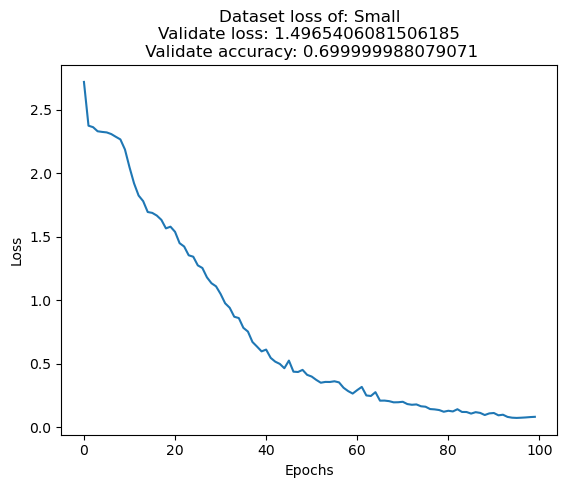

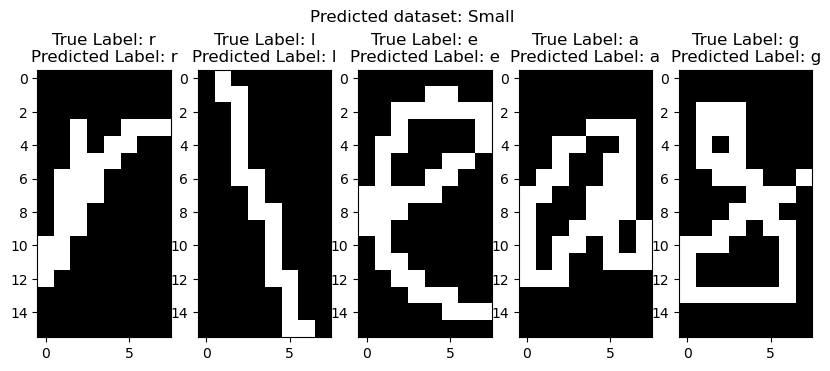

Dataset: Medium
device: cpu, epoch: 1, loss: 2.3607284512382725
device: cpu, epoch: 100, loss: 0.032253915449037565


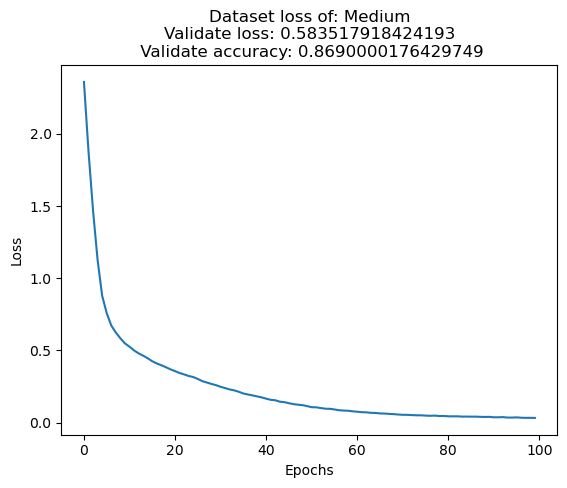

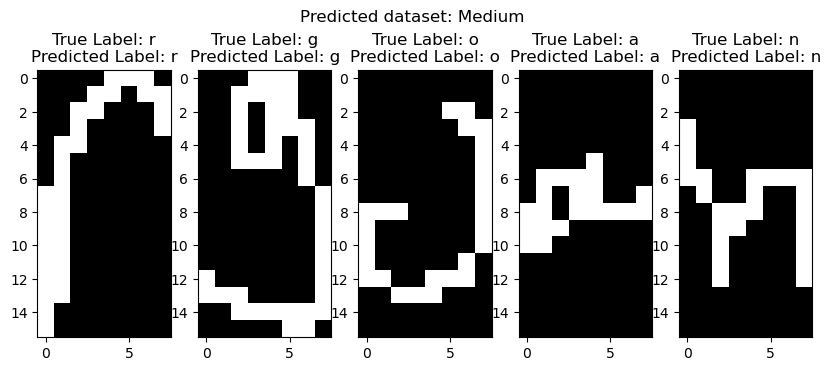

Dataset: Large
device: cpu, epoch: 1, loss: 2.1824996346478778
device: cpu, epoch: 100, loss: 0.03436211721531093


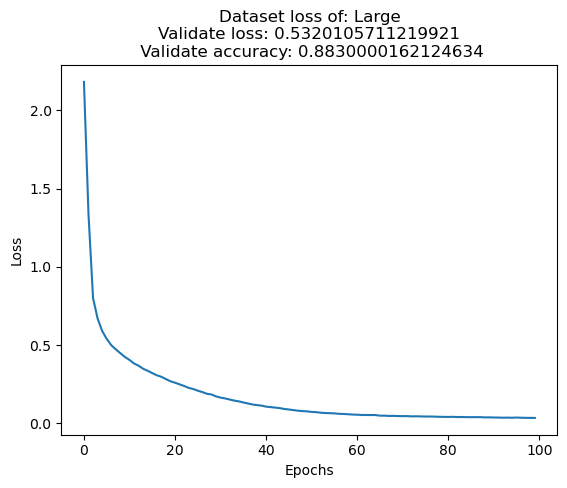

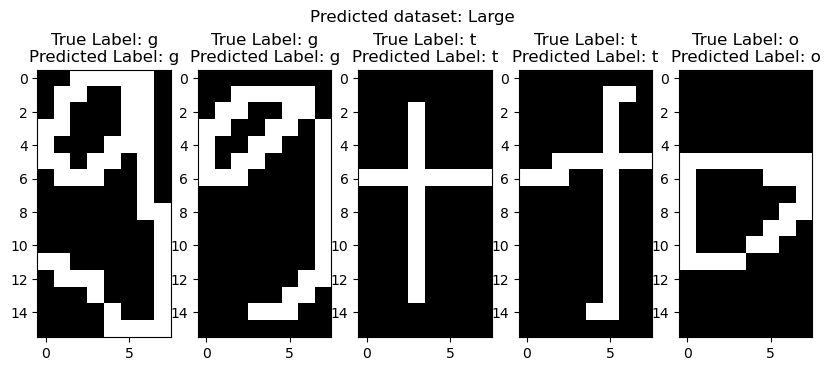

In [88]:
input_size = 128
hidden_size = 256
num_class = 10
lr = 0.3
epochs = 100

for dataset_name, train_dataloader, valid_dataloader, valid_dataset in zip(dataset_name_list, train_dataloader_list, valid_dataloader_list, valid_dataset_list):
    print(f'Dataset: {dataset_name}')
    model = ClassificationModel(input_size=input_size, hidden_size=hidden_size, num_class=num_class)
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss(reduction='mean')
    criterion.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_list = train(model=model, optimizer=optimizer, criterion=criterion, train_dataloader=train_dataloader, epochs=epochs)
    validate_loss, validate_accuracy = validate(model=model, criterion=criterion, valid_dataloader=valid_dataloader)
    show_result(loss_list, validate_loss, validate_accuracy, dataset_name, model, valid_dataset)
    


### 3.3 基于前向神经网络的回归预测
#### 3.3.1 数据可视化

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
train_dataset = np.loadtxt('./dataset/regression-dataset/data_train.csv', delimiter=',', skiprows=1)
test_dataset = np.loadtxt('./dataset/regression-dataset/data_test.csv', delimiter=',', skiprows=1)
vaild_dataset = np.loadtxt('./dataset/regression-dataset/data_valid.csv', delimiter=',', skiprows=1)
print(train_dataset.shape)
print(test_dataset.shape)
print(vaild_dataset.shape)

(2190, 2)
(730, 2)
(730, 2)


In [91]:
np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)
np.random.shuffle(vaild_dataset)
train_dataset_in = train_dataset[:1642]
test_dataset_in = train_dataset[1642:]
test_dataset_out = np.vstack((test_dataset, vaild_dataset))
print(train_dataset_in.shape)
print(test_dataset_in.shape)
print(test_dataset_out.shape)

(1642, 2)
(548, 2)
(1460, 2)


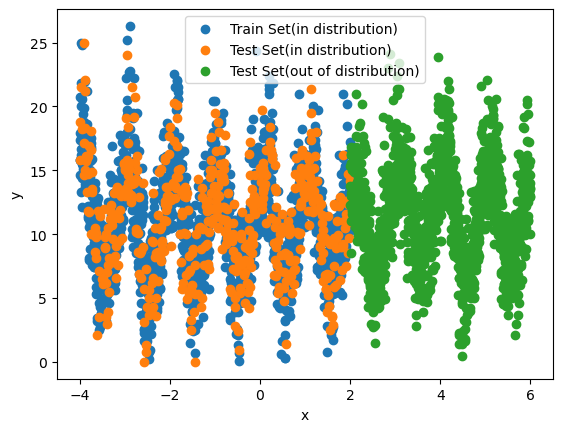

In [92]:
plt.scatter(train_dataset_in[:, 0], train_dataset_in[:, 1], label='Train Set(in distribution)')
plt.scatter(test_dataset_in[:, 0], test_dataset_in[:, 1], label='Test Set(in distribution)')
plt.scatter(test_dataset_out[:, 0], test_dataset_out[:, 1], label='Test Set(out of distribution)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 3.3.2 基于numpy


In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
train_dataset = np.loadtxt('./dataset/regression-dataset/data_train.csv', delimiter=',', skiprows=1)
test_dataset = np.loadtxt('./dataset/regression-dataset/data_test.csv', delimiter=',', skiprows=1)
vaild_dataset = np.loadtxt('./dataset/regression-dataset/data_valid.csv', delimiter=',', skiprows=1)

np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)
np.random.shuffle(vaild_dataset)
train_dataset_in = train_dataset[:1642]
test_dataset_in = train_dataset[1642:]
test_dataset_out = np.vstack((test_dataset, vaild_dataset))

train_dataset_in_X = train_dataset_in[:, :1]
train_dataset_in_Y = train_dataset_in[:, 1:]
test_dataset_in_X = test_dataset_in[:, :1]
test_dataset_in_Y = test_dataset_in[:, 1:]
test_dataset_out_X = test_dataset_out[:, :1]
test_dataset_out_Y = test_dataset_out[:, 1:]

In [95]:
class Dataset():
    def __init__(self, data, label):
        self.data = np.array(data)
        self.label = np.array(label)

    def __getitem__(self, index):
        return self.data[index], self.label[index]
    
    def __len__(self):
        return len(self.data)
    
class DataLoader():
    def __init__(self, dataset, batch_size=16, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __iter__(self):
        indexes = np.arange(len(self.dataset))
        if self.shuffle:
            np.random.shuffle(indexes)
        self.iter_indexes = iter(indexes)
        return self
    
    def __next__(self):
        data_indexes = []
        for _ in range(self.batch_size):
            try:
                data_indexes.append(next(self.iter_indexes))
            except StopIteration:
                break
        if len(data_indexes) == 0:
            raise StopIteration

        batch_data = [self.dataset[idx][0] for idx in data_indexes]
        batch_labels = [self.dataset[idx][1] for idx in data_indexes]
        return np.array(batch_data), np.array(batch_labels)
    
    def __len__(self):
        return len(self.dataset) // self.batch_size

In [96]:
class RegressionModel:
    def __init__(self, input_size=1, hidden1_size=16, hidden2_size=8, output_size=1, lr=0.01):
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.lr = lr
        np.random.seed(0)
        self.W1 = np.random.randn(self.input_size, self.hidden1_size) * 0.01
        self.b1 = np.random.randn(1, self.hidden1_size) * 0.01
        self.W2 = np.random.randn(self.hidden1_size, self.hidden2_size) * 0.01
        self.b2 = np.random.randn(1, self.hidden2_size) * 0.01
        self.W3 = np.random.randn(self.hidden2_size, self.output_size) * 0.01
        self.b3 = np.random.randn(1, self.output_size) * 0.01

        self.A1, self.A2, self.A3 = None, None, None
        self.Z1, self.Z2, self.Z3 = None, None, None
        self.dZ1, self.dZ2, self.dZ3 = None, None, None
        self.dW1, self.dW2, self.dW3 = None, None, None
        self.db1, self.db2, self.db3 = None, None, None

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.sigmoid(self.Z2)
        self.Z3 = self.A2 @ self.W3 + self.b3
        self.A3 = self.Z3
        return self.A3
    
    def backward(self, X, Y, out):
        data_nums = len(X)
        self.dZ3 = self.A3 - Y
        self.dW3 = self.A2.T @ self.dZ3 / data_nums
        self.db3 = np.sum(self.dZ3, axis=0, keepdims=True) / data_nums
        self.dZ2 = self.dZ3 @ self.W3.T * self.sigmoid_derivative(self.Z2)
        self.dW2 = self.A1.T @ self.dZ2 / data_nums
        self.db2 = np.sum(self.dZ2, axis=0, keepdims=True) / data_nums
        self.dZ1 = self.dZ2 @ self.W2.T * self.sigmoid_derivative(self.Z1)
        self.dW1 = X.T @ self.dZ1 / data_nums
        self.db1 = np.sum(self.dZ1, axis=0, keepdims=True) / data_nums

        self.W1 -= self.dW1 * self.lr
        self.b1 -= self.db1 * self.lr
        self.W2 -= self.dW2 * self.lr
        self.b2 -= self.db2 * self.lr
        self.W3 -= self.dW3 * self.lr
        self.b3 -= self.db3 * self.lr

    def rmse_loss(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def sigmoid_derivative(self, X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))

In [97]:
def train(model, epochs, train_dataloader_in):
    loss_list = []
    for epoch in range(1, epochs+1):
        loss = 0
        for data_batch, lable_batch in train_dataloader_in:
            out = model.forward(data_batch)
            loss += model.rmse_loss(lable_batch, out)
            model.backward(data_batch, lable_batch, out)

        loss /= len(train_dataloader_in)
        loss_list.append(loss)
        if epoch % 1000 == 0 or epoch == 1:
                print(f"epoch: {epoch}, loss: {loss}")
    return loss_list

def validate(model, test_dataset_in, test_dataset_out):
     out = model.forward(test_dataset_in.data)
     loss_in = model.rmse_loss(test_dataset_in.label, out)
     out = model.forward(test_dataset_out.data)
     loss_out = model.rmse_loss(test_dataset_out.label, out)
     return loss_in, loss_out

def show_result(model, loss_list, loss_in, loss_out, train_dataset_in, test_dataset_in, test_dataset_out):
    epochs = np.arange(len(loss_list))
    plt.plot(epochs, loss_list)
    plt.title("loss of training")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

    x = np.linspace(-4, 6, 100).reshape(-1, 1)
    plt.plot(x, model.forward(x), label="Prediction", color='red')
    plt.title(f'Test Loss(in distribution): {loss_in}\nTest Loss(out of distribution): {loss_out}')
    plt.scatter(train_dataset_in.data, train_dataset_in.label, label="Train Set(in distribution)")
    plt.scatter(test_dataset_in.data, test_dataset_in.label, label="Test Set(in distribution)")
    plt.scatter(test_dataset_out.data, test_dataset_out.label, label="Test Set(out of distribution)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [98]:
batch_size = 64
train_dataset_in = Dataset(train_dataset_in_X, train_dataset_in_Y)
test_dataset_in = Dataset(test_dataset_in_X, test_dataset_in_Y)
test_dataset_out = Dataset(test_dataset_out_X, test_dataset_out_Y)
train_dataloader_in = DataLoader(train_dataset_in, batch_size=batch_size, shuffle=True)
# test_dataloader_in = DataLoader(test_dataset_in, batch_size=batch_size, shuffle=True)
# test_dataloader_out = DataLoader(test_dataset_out, batch_size=batch_size, shuffle=True)

epoch: 1, loss: 5.1534857640835465
epoch: 1000, loss: 3.9719919320793546
epoch: 2000, loss: 3.783324491214218
epoch: 3000, loss: 3.8062987907021353
epoch: 4000, loss: 3.795287576406837
epoch: 5000, loss: 3.7870080946027254
epoch: 6000, loss: 3.782340193176088
epoch: 7000, loss: 3.7576159429688936
epoch: 8000, loss: 3.7886199699548344
epoch: 9000, loss: 3.7785241226157957
epoch: 10000, loss: 3.774963236619675
epoch: 11000, loss: 3.7646275043222186
epoch: 12000, loss: 3.7739180642599353
epoch: 13000, loss: 3.764826551874644
epoch: 14000, loss: 3.7840343733630393
epoch: 15000, loss: 3.7764848269123674
epoch: 16000, loss: 3.7931208448309315
epoch: 17000, loss: 3.7763544385849483
epoch: 18000, loss: 3.769395479343466
epoch: 19000, loss: 3.7605175244392326
epoch: 20000, loss: 3.772497668716686


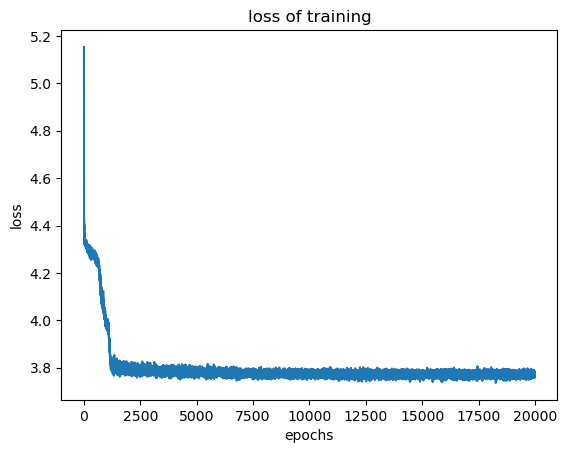

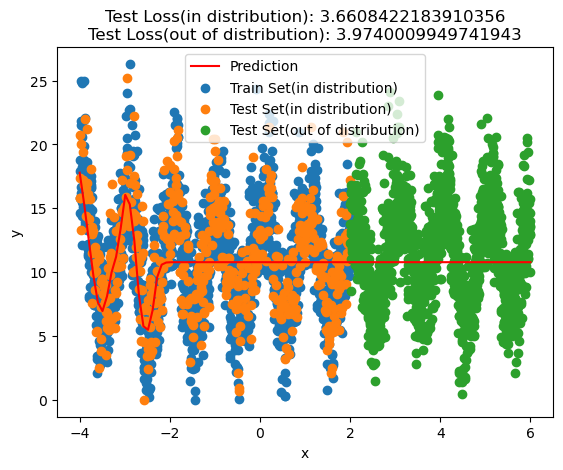

In [99]:
epochs = 20000
lr = 0.1
input_size = 1
hidden1_size = 64
hidden2_size = 32
output_size = 1

model = RegressionModel(input_size, hidden1_size, hidden2_size, output_size, lr)
loss_list = train(model, epochs, train_dataloader_in)
loss_in, loss_out = validate(model, test_dataset_in, test_dataset_out)
show_result(model, loss_list, loss_in, loss_out, train_dataset_in, test_dataset_in, test_dataset_out)

#### 3.3.3 基于Pytorch

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [101]:
train_dataset = np.loadtxt('./dataset/regression-dataset/data_train.csv', delimiter=',', skiprows=1)
test_dataset = np.loadtxt('./dataset/regression-dataset/data_test.csv', delimiter=',', skiprows=1)
vaild_dataset = np.loadtxt('./dataset/regression-dataset/data_valid.csv', delimiter=',', skiprows=1)

np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)
np.random.shuffle(vaild_dataset)
train_dataset_in = train_dataset[:1642]
test_dataset_in = train_dataset[1642:]
test_dataset_out = np.vstack((test_dataset, vaild_dataset))

train_dataset_in_X = train_dataset_in[:, :1]
train_dataset_in_Y = train_dataset_in[:, 1:]
test_dataset_in_X = test_dataset_in[:, :1]
test_dataset_in_Y = test_dataset_in[:, 1:]
test_dataset_out_X = test_dataset_out[:, :1]
test_dataset_out_Y = test_dataset_out[:, 1:]

In [102]:
class Reg_Dataset(Dataset):
    def __init__(self, data, label):
        super(Reg_Dataset, self).__init__()
        self.data = torch.from_numpy(data).float()
        self.label = torch.from_numpy(label).float()

    def __getitem__(self, index):
        return self.data[index], self.label[index]
    
    def __len__(self):
        return len(self.data)

In [103]:
class RegressionModel(torch.nn.Module):
    def __init__(self, input_size=1, hidden1_size=16, hidden2_size=8, output_size=1):
        super(RegressionModel, self).__init__()
        self.l1 = torch.nn.Linear(input_size, hidden1_size)
        self.l2 = torch.nn.Linear(hidden1_size, hidden2_size)
        self.l3 = torch.nn.Linear(hidden2_size, output_size)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.l1(x)
        x = self.sigmoid(x)
        x = self.l2(x)
        x = self.sigmoid(x)
        x = self.l3(x)
        return x

In [104]:
def train(model, optimizer, criterion, epochs, train_dataloader_in):
    loss_list = []
    for epoch in range(1, epochs+1):
        loss = 0
        for data_batch, lable_batch in train_dataloader_in:
            data_batch = data_batch.to(device)
            lable_batch = lable_batch.to(device)
            optimizer.zero_grad()
            out = model(data_batch)
            _loss = criterion(out, lable_batch)
            loss += _loss.item()
            _loss.backward()
            optimizer.step()
        loss /= len(train_dataloader_in)
        loss_list.append(loss)
        if epoch % 1000 == 0 or epoch == 1:
            print(f"device: {device}, epoch: {epoch}, loss: {loss}")
    return loss_list

def validate(model, criterion, test_dataset_in, test_dataset_out):
    loss_in = 0
    loss_out = 0
    with torch.no_grad():
        data, label = test_dataset_in.data, test_dataset_in.label
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        loss_in = criterion(out, label).item()
        data, label = test_dataset_out.data, test_dataset_out.label
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        loss_out = criterion(out, label).item()
        return loss_in, loss_out
    
def predict(model, x):
    x = torch.from_numpy(x).float().to(device)
    with torch.no_grad():
        pred = model(x)
        pred = pred.cpu().numpy()
        return pred

def show_result(model, loss_list, loss_in, loss_out, train_dataset_in, test_dataset_in, test_dataset_out):
    epochs = np.arange(len(loss_list))
    plt.plot(epochs, loss_list)
    plt.title("loss of training")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

    x = np.linspace(-4, 6, 100).reshape(-1, 1)
    pred = predict(model, x)
    plt.plot(x, pred, label="Prediction", color="red")
    plt.title(f'Test Loss(in distribution): {loss_in}\nTest Loss(out of distribution): {loss_out}')
    plt.scatter(train_dataset_in.data, train_dataset_in.label, label="Train Set(in distribution)")
    plt.scatter(test_dataset_in.data, test_dataset_in.label, label="Test Set(in distribution)")
    plt.scatter(test_dataset_out.data, test_dataset_out.label, label="Test Set(out of distribution)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [105]:
batch_size = 64
train_dataset_in = Reg_Dataset(train_dataset_in_X, train_dataset_in_Y)
test_dataset_in = Reg_Dataset(test_dataset_in_X, test_dataset_in_Y)
test_dataset_out = Reg_Dataset(test_dataset_out_X, test_dataset_out_Y)
train_dataloader_in = DataLoader(train_dataset_in, batch_size=batch_size, shuffle=True)
# test_dataloader_in = DataLoader(test_dataset_in, batch_size=batch_size, shuffle=True)
# test_dataloader_out = DataLoader(test_dataset_out, batch_size=batch_size, shuffle=True)

device: cpu, epoch: 1, loss: 28.19928213266226
device: cpu, epoch: 1000, loss: 17.305054848010723
device: cpu, epoch: 2000, loss: 16.915971132425163
device: cpu, epoch: 3000, loss: 13.791825294494629
device: cpu, epoch: 4000, loss: 11.709505814772387
device: cpu, epoch: 5000, loss: 10.327709308037392
device: cpu, epoch: 6000, loss: 8.814683565726646
device: cpu, epoch: 7000, loss: 8.791698712569017
device: cpu, epoch: 8000, loss: 8.054163822760948
device: cpu, epoch: 9000, loss: 7.995706649926992
device: cpu, epoch: 10000, loss: 7.9170735615950365
device: cpu, epoch: 11000, loss: 7.92208691743704
device: cpu, epoch: 12000, loss: 7.965939228351299
device: cpu, epoch: 13000, loss: 7.436163132007305
device: cpu, epoch: 14000, loss: 7.354682042048528
device: cpu, epoch: 15000, loss: 7.462441077599158
device: cpu, epoch: 16000, loss: 7.402312792264498
device: cpu, epoch: 17000, loss: 7.366903983629667
device: cpu, epoch: 18000, loss: 7.3971952475034275
device: cpu, epoch: 19000, loss: 7.411

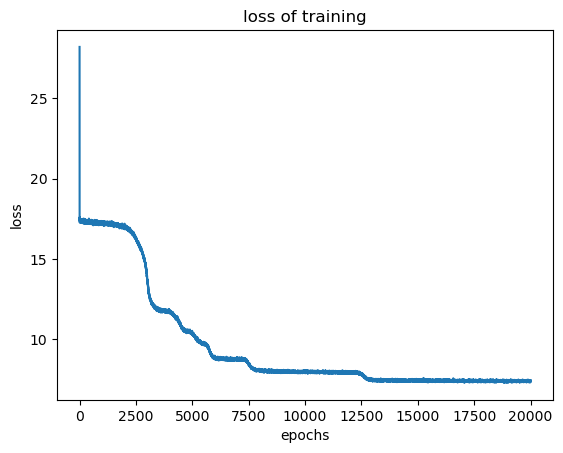

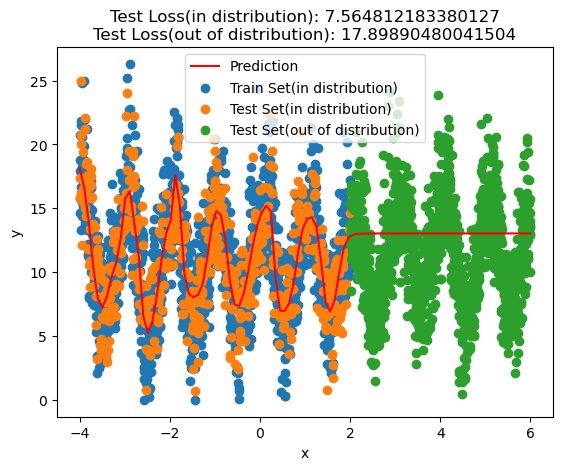

In [106]:
epochs = 20000
lr = 0.01
input_size = 1
hidden1_size = 64
hidden2_size = 32
output_size = 1

model = RegressionModel(input_size, hidden1_size, hidden2_size, output_size)
model.to(device)
criterion = torch.nn.MSELoss()
criterion.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_list = train(model, optimizer, criterion, epochs, train_dataloader_in)
loss_in, loss_out = validate(model, criterion, test_dataset_in, test_dataset_out)
show_result(model, loss_list, loss_in, loss_out, train_dataset_in, test_dataset_in, test_dataset_out)